# Example usage

To use `project_python_203` in a project:

In [1]:
#import project_python_203
#print(project_python_203.__version__)

#### Package Import

In [2]:
import project_python_203.Data_treatment

In [3]:
from project_python_203.Data_treatment import *
from pybacktestchain.data_module import *
from pybacktestchain.broker import *
from project_python_203.Trades import *
import importlib

In [4]:
importlib.reload(project_python_203.Data_treatment)

<module 'project_python_203.Data_treatment' from '/Users/jeandeslis/opt/anaconda3/envs/pybacktestchain/lib/python3.12/site-packages/project_python_203/Data_treatment.py'>

#### Range of date and universe

In [5]:
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'NVDA', 'INTC', 'CSCO', 'NFLX']
start_date = '2010-01-01'
end_date = '2020-01-01'
data = get_stocks_data(tickers, start_date, end_date)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,ticker
0,2010-01-04 00:00:00-05:00,7.622500,7.660714,7.585000,7.643214,6.447413,493729600,AAPL
1,2010-01-05 00:00:00-05:00,7.664286,7.699643,7.616071,7.656429,6.458559,601904800,AAPL
2,2010-01-06 00:00:00-05:00,7.656429,7.686786,7.526786,7.534643,6.355827,552160000,AAPL
3,2010-01-07 00:00:00-05:00,7.562500,7.571429,7.466071,7.520714,6.344077,477131200,AAPL
4,2010-01-08 00:00:00-05:00,7.510714,7.571429,7.466429,7.570714,6.386255,447610800,AAPL


#### Data Treatment

In [6]:
print(Data_treatment.__doc__)
print(Data_treatment.__module__)

Data_treatment(data: pandas.core.frame.DataFrame)
project_python_203.Data_treatment


In [7]:
data_treatment = Data_treatment(data)

In [ ]:
MVA = data_treatment.compute_moving_average(short_window=20, long_window=100,)
MVA

,Date,Adj Close,Volume,ticker,Short_MA,Long_MA
0,2010-01-04 00:00:00-05:00,6.447413,493729600,AAPL,NaN,NaN
1,2010-01-05 00:00:00-05:00,6.458559,601904800,AAPL,NaN,NaN
2,2010-01-06 00:00:00-05:00,6.355827,552160000,AAPL,NaN,NaN
3,2010-01-07 00:00:00-05:00,6.344077,477131200,AAPL,NaN,NaN
4,2010-01-08 00:00:00-05:00,6.386255,447610800,AAPL,NaN,NaN
...,...,...,...,...,...,...
2389,2019-12-24 00:00:00-05:00,28.350000,120820500,TSLA,24.091300,18.905800
2390,2019-12-26 00:00:00-05:00,28.729334,159508500,TSLA,24.431367,19.040880
2391,2019-12-27 00:00:00-05:00,28.691999,149185500,TSLA,24.761667,19.173967
2392,2019-12-30 00:00:00-05:00,27.646667,188796000,TSLA,25.044200,19.294820


**Plot all the Moving averages for all stocks :**

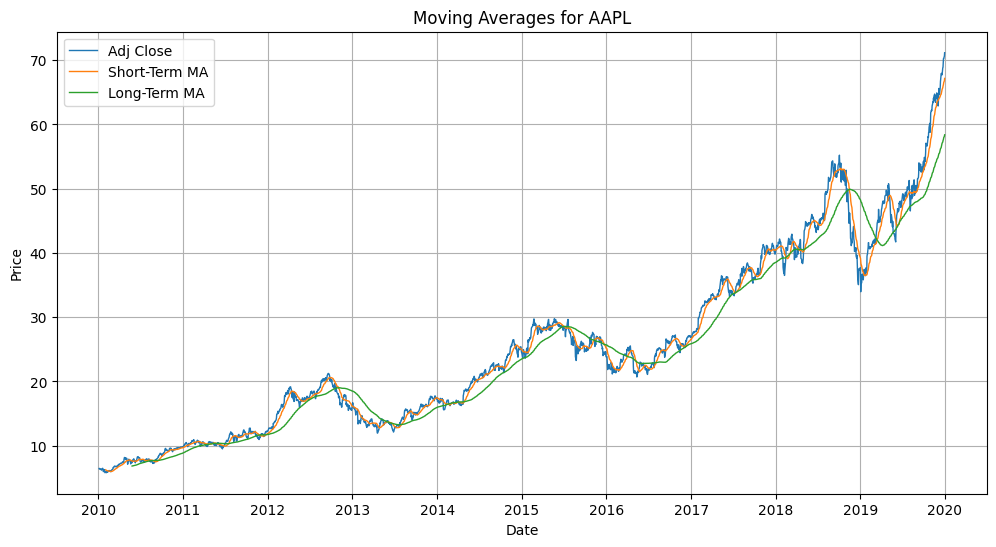

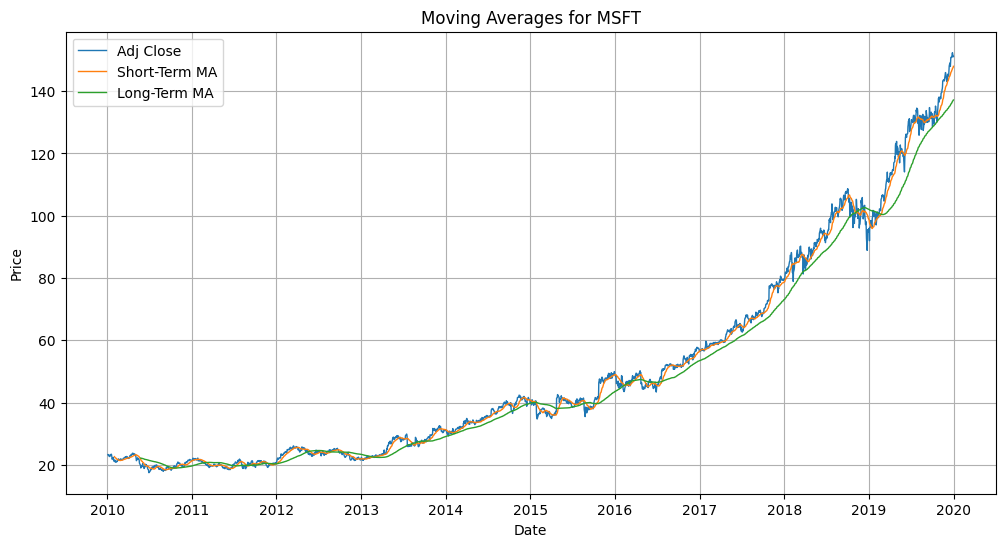

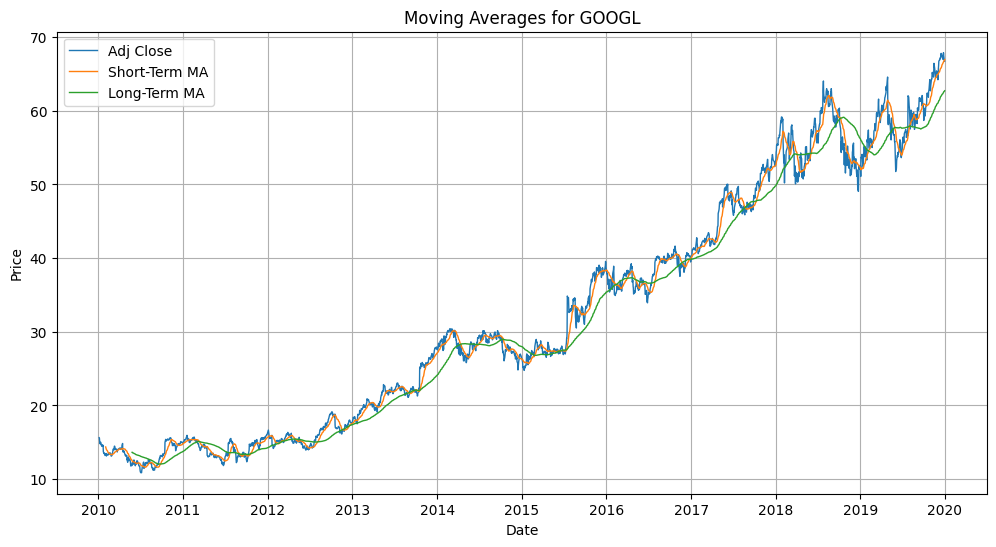

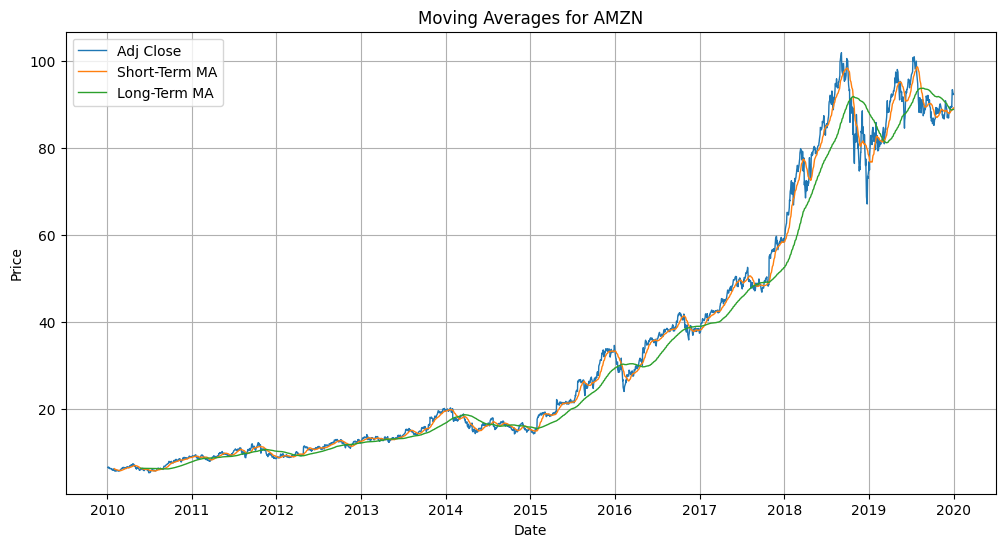

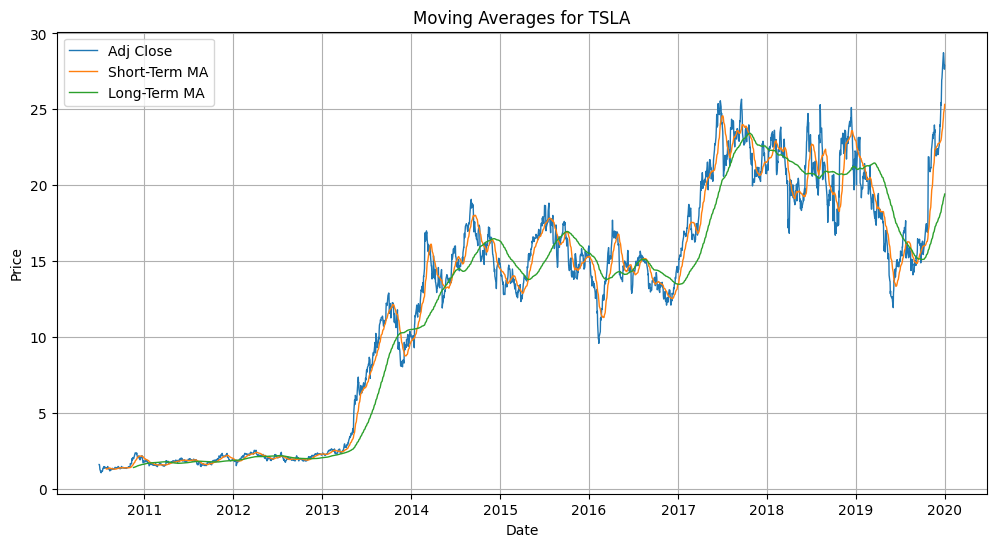

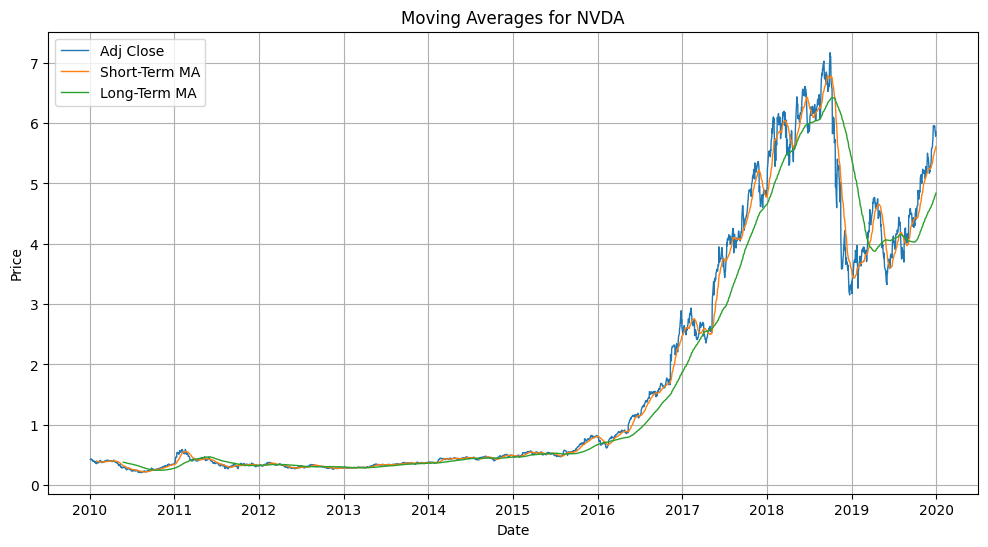

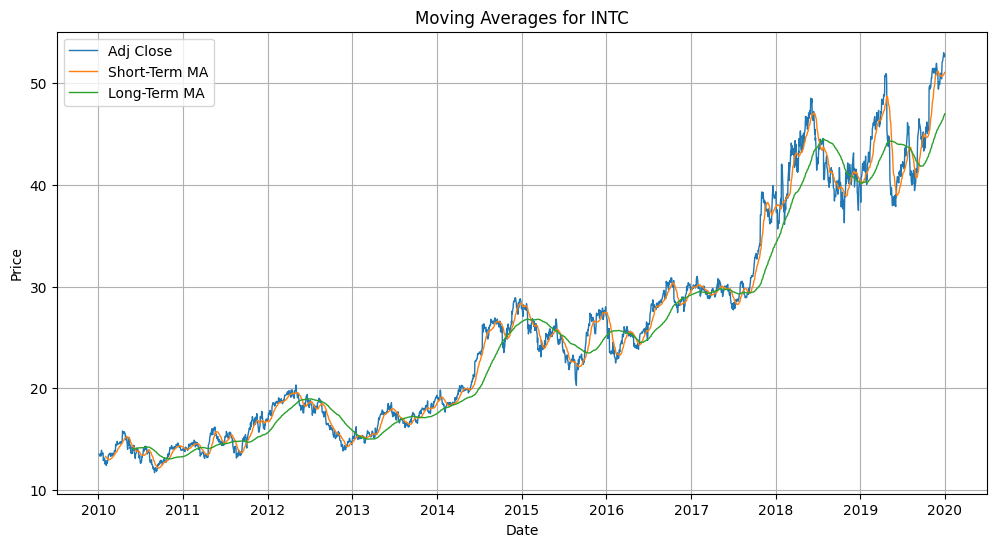

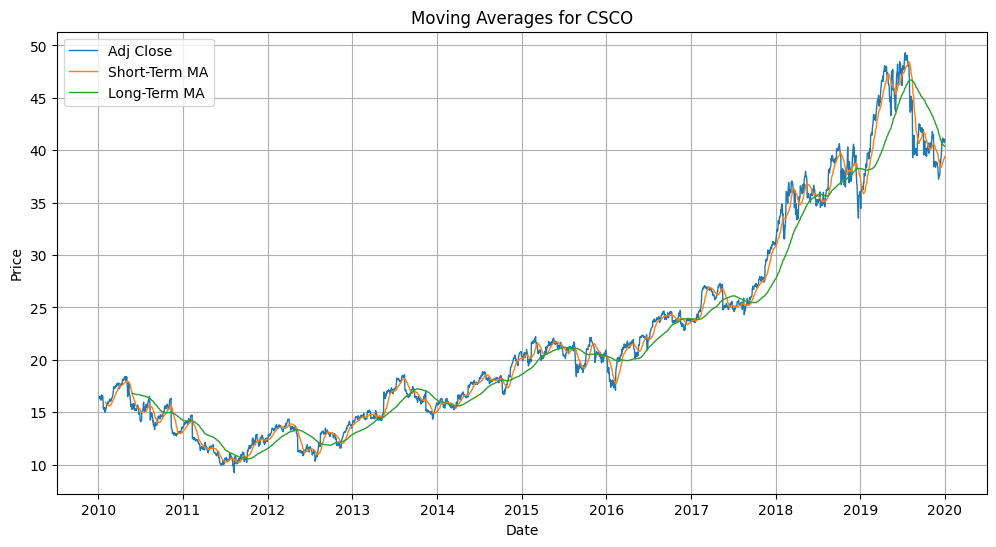

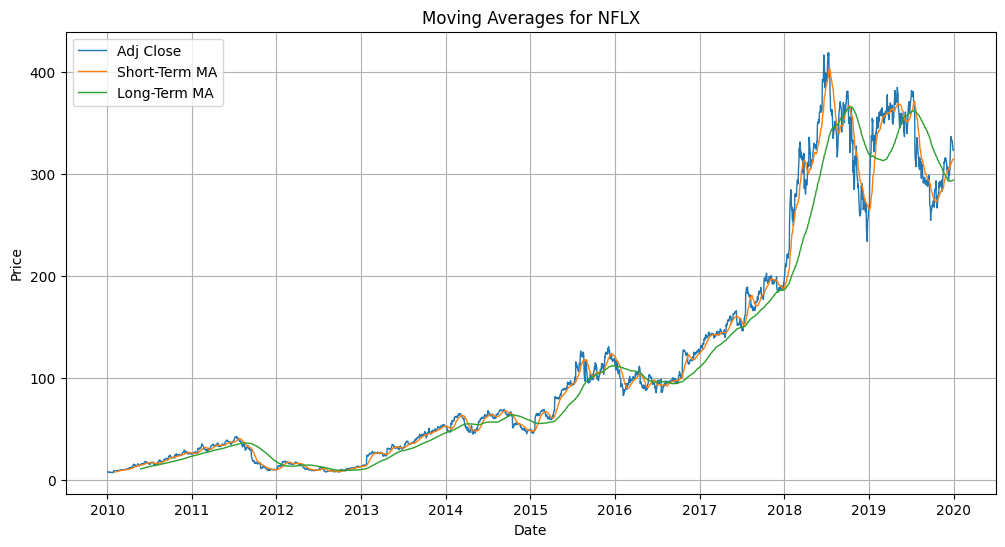

In [7]:
for ticker in tickers:
    data_treatment.plot_moving_average(ticker)

#### Trading Strategies and compute the buy and sell signals.

In [9]:
Trading_strat = TradingStrategy(MVA)
Trading_strat

TradingStrategy(data_MA=                          Date  Adj Close     Volume ticker   Short_MA  \
0    2010-01-04 00:00:00-05:00   6.447411  493729600   AAPL        NaN   
1    2010-01-05 00:00:00-05:00   6.458560  601904800   AAPL        NaN   
2    2010-01-06 00:00:00-05:00   6.355828  552160000   AAPL        NaN   
3    2010-01-07 00:00:00-05:00   6.344077  477131200   AAPL        NaN   
4    2010-01-08 00:00:00-05:00   6.386254  447610800   AAPL        NaN   
...                        ...        ...        ...    ...        ...   
2389 2019-12-24 00:00:00-05:00  28.350000  120820500   TSLA  24.091300   
2390 2019-12-26 00:00:00-05:00  28.729334  159508500   TSLA  24.431367   
2391 2019-12-27 00:00:00-05:00  28.691999  149185500   TSLA  24.761667   
2392 2019-12-30 00:00:00-05:00  27.646667  188796000   TSLA  25.044200   
2393 2019-12-31 00:00:00-05:00  27.888666  154285500   TSLA  25.322400   

        Long_MA  
0           NaN  
1           NaN  
2           NaN  
3           NaN

In [10]:
signals  = Trading_strat.compute_trading_signals()
signals

/Users/jeandeslis/Desktop/Cours M2 203/S1/Python/Projet/project_python_203/src/project_python_203/Data_treatment.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data_MA['Signal'] = 0
/Users/jeandeslis/Desktop/Cours M2 203/S1/Python/Projet/project_python_203/src/project_python_203/Data_treatment.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data_MA['Signal'] = (self.data_MA['Short_MA'] > self.data_MA['Long_MA']).astype(int)
/Users/jeandeslis/Desktop/Cours M2 203/S1/Python/Projet/project

,Date,Adj Close,Volume,ticker,Short_MA,Long_MA,Signal,Position
0,2010-01-05 00:00:00-05:00,6.458560,601904800,AAPL,NaN,NaN,0,0.0
1,2010-01-06 00:00:00-05:00,6.355828,552160000,AAPL,NaN,NaN,0,0.0
2,2010-01-07 00:00:00-05:00,6.344077,477131200,AAPL,NaN,NaN,0,0.0
3,2010-01-08 00:00:00-05:00,6.386254,447610800,AAPL,NaN,NaN,0,0.0
4,2010-01-11 00:00:00-05:00,6.329919,462229600,AAPL,NaN,NaN,0,0.0
...,...,...,...,...,...,...,...,...
22508,2019-12-24 00:00:00-05:00,28.350000,120820500,TSLA,24.091300,18.905800,1,0.0
22509,2019-12-26 00:00:00-05:00,28.729334,159508500,TSLA,24.431367,19.040880,1,0.0
22510,2019-12-27 00:00:00-05:00,28.691999,149185500,TSLA,24.761667,19.173967,1,0.0
22511,2019-12-30 00:00:00-05:00,27.646667,188796000,TSLA,25.044200,19.294820,1,0.0


**Plot all the trading signals for the given stock and time period.**

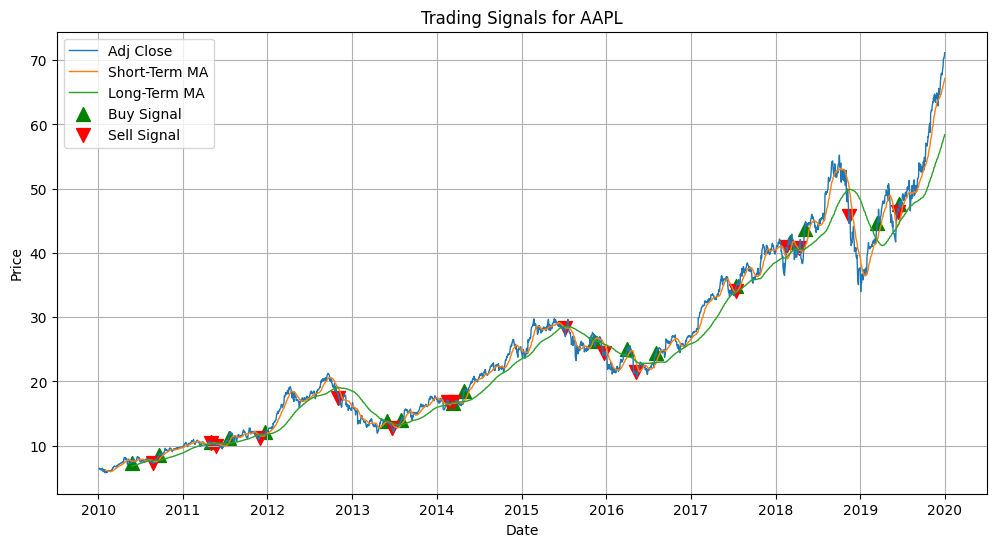

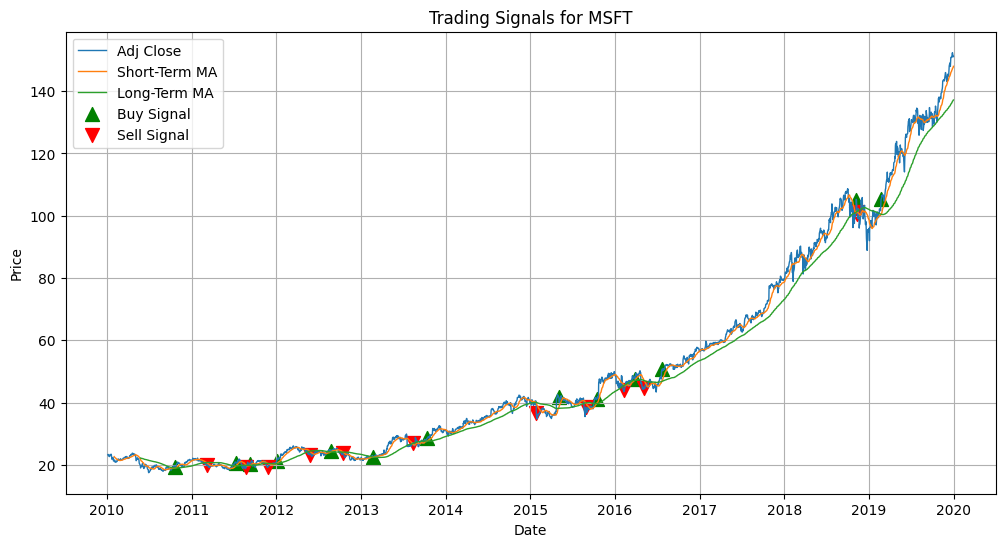

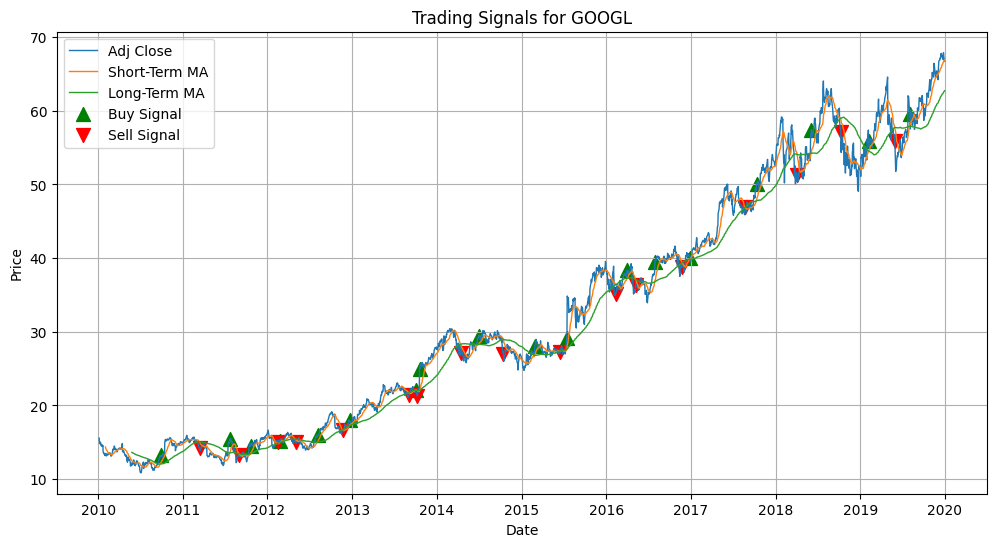

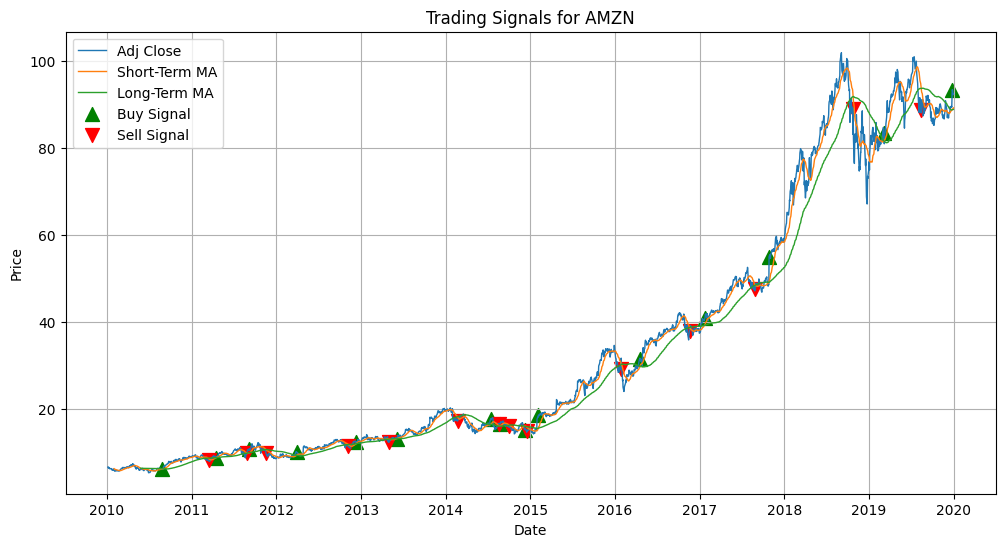

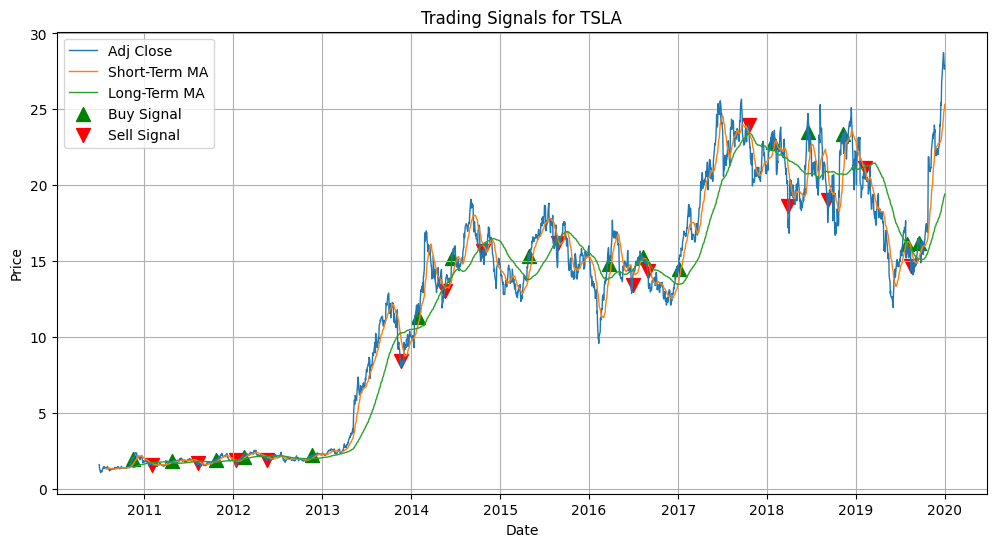

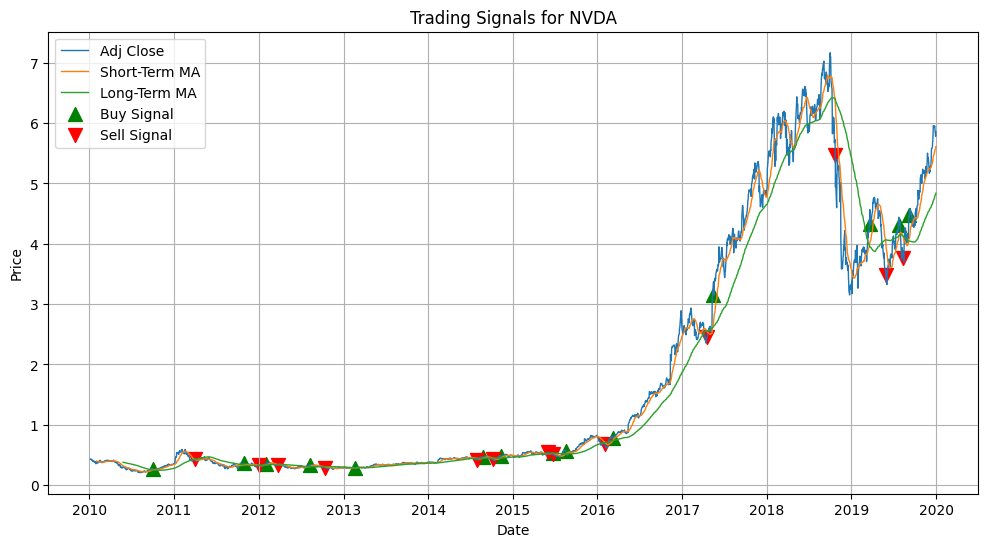

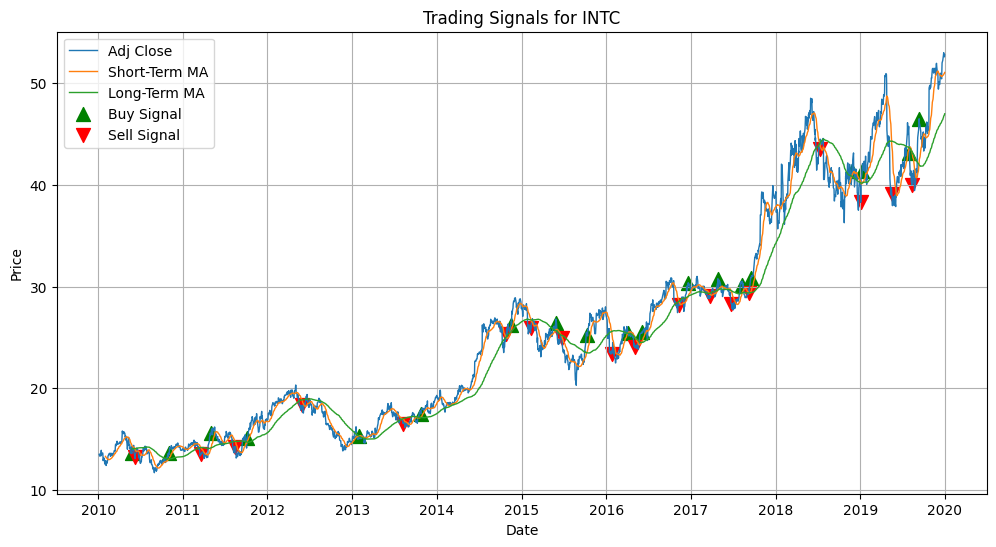

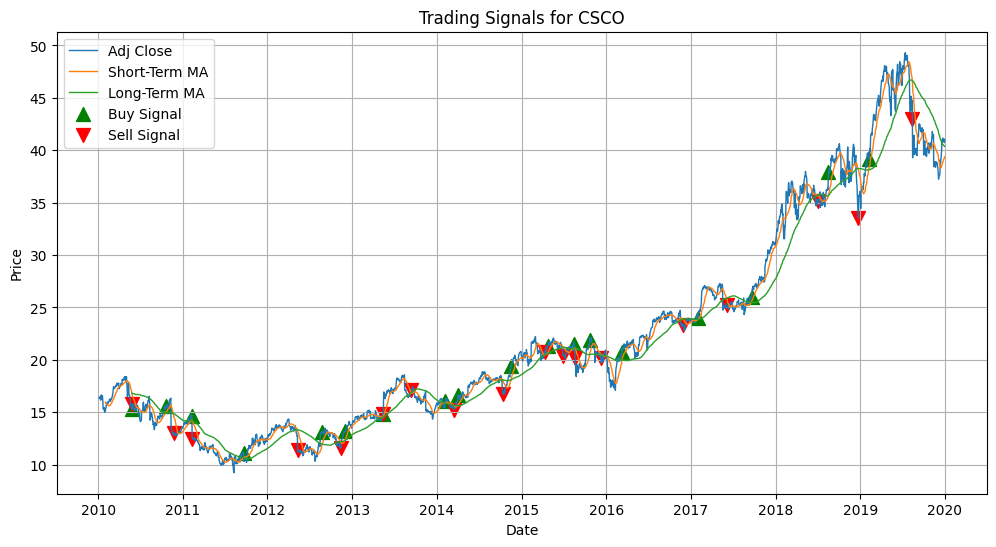

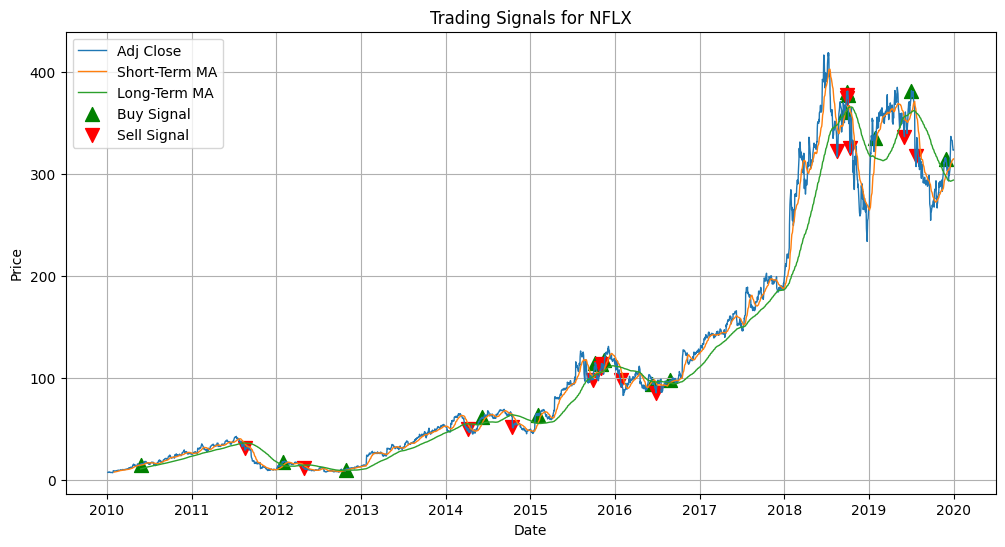

In [11]:
for ticker in tickers:
    Trading_strat.plot_trading_signals(ticker)

#### Let's try the moving average strategy : 

In [15]:
initial_cash = 10000
broker = Broker(cash=initial_cash, verbose=True)
broker


Broker(cash=10000, positions={}, transaction_log=Empty DataFrame
Columns: [Date, Action, Ticker, Quantity, Price, Cash]
Index: [], entry_prices={}, verbose=True)

In [14]:
trades = Trades(strategy=Trading_strat, broker=broker)
trades

Trades(strategy=TradingStrategy(data_MA=                           Date  Adj Close     Volume ticker   Short_MA  \
0     2010-01-05 00:00:00-05:00   6.458560  601904800   AAPL        NaN   
1     2010-01-06 00:00:00-05:00   6.355828  552160000   AAPL        NaN   
2     2010-01-07 00:00:00-05:00   6.344077  477131200   AAPL        NaN   
3     2010-01-08 00:00:00-05:00   6.386254  447610800   AAPL        NaN   
4     2010-01-11 00:00:00-05:00   6.329919  462229600   AAPL        NaN   
...                         ...        ...        ...    ...        ...   
22508 2019-12-24 00:00:00-05:00  28.350000  120820500   TSLA  24.091300   
22509 2019-12-26 00:00:00-05:00  28.729334  159508500   TSLA  24.431367   
22510 2019-12-27 00:00:00-05:00  28.691999  149185500   TSLA  24.761667   
22511 2019-12-30 00:00:00-05:00  27.646667  188796000   TSLA  25.044200   
22512 2019-12-31 00:00:00-05:00  27.888666  154285500   TSLA  25.322400   

         Long_MA  Signal  Position  
0            NaN      

**We can filter for any date, to see if there is a buy or sell signal.**  
The Buy or Sell signal is determined in the `Signal`column : 
* 1 : you need to be long the stock 
* 0 : you need to be short the stock

We then have the `Position`column that tells us when to buy or sell the stock : 
* 1 : you need to buy the stock 
* -1 : you need to sell the stock


In [16]:
# Filter the signals DataFrame for the specified date
date = '2010-05-28' # Date format: 'YYYY-MM-DD'
filtered_signals = signals[signals['Date'] == date]
filtered_signals

,Date,Adj Close,Volume,ticker,Short_MA,Long_MA,Signal,Position
100,2010-05-28 00:00:00-04:00,7.738945,815614800,AAPL,7.575701,6.849941,1,0.0
2615,2010-05-28 00:00:00-04:00,6.273000,79096000,AMZN,6.380300,6.460040,0,0.0
5130,2010-05-28 00:00:00-04:00,15.454422,56435900,CSCO,16.575797,16.792266,0,0.0
7645,2010-05-28 00:00:00-04:00,12.109006,115676208,GOOGL,12.400817,13.577983,0,0.0
10160,2010-05-28 00:00:00-04:00,14.078609,72712600,INTC,14.293833,14.054720,1,0.0
12675,2010-05-28 00:00:00-04:00,19.641624,67496900,MSFT,21.350440,22.155335,0,0.0
15190,2010-05-28 00:00:00-04:00,15.878571,28188300,NFLX,14.558714,10.942514,1,0.0
17705,2010-05-28 00:00:00-04:00,0.301263,545116000,NVDA,0.311969,0.375141,0,0.0


**We can also consider that the `Adj Close` is the market value of the stock at the end of the trading day.**

In [18]:
# Convert to dictionary with the tickers as keys and the adjusted close prices as values for a given date
market_val = dict(zip(filtered_signals['ticker'], filtered_signals['Adj Close']))
market_val


{'AAPL': 7.738945484161377,
 'AMZN': 6.2729997634887695,
 'CSCO': 15.454421997070312,
 'GOOGL': 12.10900592803955,
 'INTC': 14.078609466552734,
 'MSFT': 19.641624450683594,
 'NFLX': 15.878570556640625,
 'NVDA': 0.3012625277042389}

**Let's run the moving average strategy over the specified time period and see how it performs :**

In [19]:
trades_ex, ptf_val = trades.execute_trades(signals)

# Display the executed trades
print('Executed trades:')
display(trades_ex)
print('Portfolio value:')
display(ptf_val)

/Users/jeandeslis/Desktop/Cours M2 203/S1/Python/Projet/pybacktestchain/src/pybacktestchain/broker.py:115: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.transaction_log = pd.concat([self.transaction_log, transaction], ignore_index=True)


Executed trades:


,Date,Action,Ticker,Quantity,Price,Cash
0,2010-05-26 00:00:00-04:00,BUY,AAPL,271,7.354225,8007.004982
1,2010-05-26 00:00:00-04:00,BUY,CSCO,130,15.274240,6021.353718
2,2010-05-26 00:00:00-04:00,BUY,INTC,147,13.605376,4021.363410
3,2010-05-26 00:00:00-04:00,BUY,NFLX,133,14.971429,2030.163370
4,2010-05-27 00:00:00-04:00,SELL,CSCO,130,15.794740,4083.479534
...,...,...,...,...,...,...
206,2019-08-14 00:00:00-04:00,SELL,CSCO,535,42.982067,42294.942943
207,2019-08-16 00:00:00-04:00,SELL,TSLA,808,14.662667,54142.378101
208,2019-09-05 00:00:00-04:00,BUY,NVDA,4677,4.471442,33229.442825
209,2019-09-12 00:00:00-04:00,BUY,INTC,454,46.503754,12116.738663


Portfolio value:


,Date,Portfolio Value
0,2010-01-05 00:00:00-05:00,10000.000000
1,2010-01-06 00:00:00-05:00,10000.000000
2,2010-01-07 00:00:00-05:00,10000.000000
3,2010-01-08 00:00:00-05:00,10000.000000
4,2010-01-11 00:00:00-05:00,10000.000000
...,...,...
2510,2019-12-24 00:00:00-05:00,134736.143133
2511,2019-12-26 00:00:00-05:00,136135.243440
2512,2019-12-27 00:00:00-05:00,135983.249071
2513,2019-12-30 00:00:00-05:00,134425.919205


**Check the final position of the broker:**

In [22]:
broker.positions

{'MSFT': Position(ticker='MSFT', quantity=196, entry_price=105.2516098022461),
 'AAPL': Position(ticker='AAPL', quantity=470, entry_price=47.63334274291992),
 'NVDA': Position(ticker='NVDA', quantity=4677, entry_price=4.471442222595215),
 'INTC': Position(ticker='INTC', quantity=454, entry_price=46.50375747680664),
 'TSLA': Position(ticker='TSLA', quantity=748, entry_price=16.187332153320312)}

#### Run a backtest, that does all the above steps in one go :

In [20]:
backtest = MyBacktest(
    initial_date=datetime(2010, 1, 1),
    final_date=datetime(2020, 1, 1),
    universe = ['AAPL', 'MSFT', 'GOOGL'],
    initial_cash=10000,
)

backtest.run_backtest()

INFO:root:Running backtest from 2010-01-01 00:00:00 to 2020-01-01 00:00:00.
INFO:root:Retrieving price data for universe
/Users/jeandeslis/Desktop/Cours M2 203/S1/Python/Projet/project_python_203/src/project_python_203/Data_treatment.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data_MA['Signal'] = 0
/Users/jeandeslis/Desktop/Cours M2 203/S1/Python/Projet/project_python_203/src/project_python_203/Data_treatment.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data_MA['Signal'] = (self.d

(                        Date Action Ticker Quantity      Price          Cash
 0  2010-05-26 00:00:00-04:00    BUY   AAPL    27195   7.354225  8.000018e+05
 1  2010-08-24 00:00:00-04:00   SELL   AAPL    27195   7.228295  9.965753e+05
 2  2010-09-20 00:00:00-04:00    BUY   AAPL    23358   8.532781  7.972666e+05
 3  2010-09-27 00:00:00-04:00    BUY  GOOGL    15154  13.225580  5.968462e+05
 4  2010-10-22 00:00:00-04:00    BUY   MSFT    10755  19.424950  3.879309e+05
 ..                       ...    ...    ...      ...        ...           ...
 88 2019-03-15 00:00:00-04:00    BUY   AAPL     8509  44.632881  7.367851e+05
 89 2019-05-30 00:00:00-04:00   SELL  GOOGL     6649  55.867973  1.108251e+06
 90 2019-06-14 00:00:00-04:00   SELL   AAPL     8509  46.398399  1.503055e+06
 91 2019-06-19 00:00:00-04:00    BUY   AAPL     8225  47.633343  1.111271e+06
 92 2019-08-02 00:00:00-04:00    BUY  GOOGL     6628  59.599945  7.162426e+05
 
 [93 rows x 6 columns],
                           Date  Portf